In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from collections import defaultdict

# np.random.seed(42) 

In [31]:

data = pd.read_csv("data/TCGAdata.txt", sep=" ")
labels = pd.read_csv("data/TCGAlabels", sep=" ")

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1991,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000
1,-1.168003,1.261756,-1.534537,-0.156028,-0.700344,3.985627,2.432774,0.767859,1.225563,-0.198581,...,-0.015099,-0.217915,0.123574,-3.209894,-1.26123,-1.676247,-0.8625,-1.103947,-1.109631,0.43515
2,-3.272103,-0.269244,-1.534537,-0.679228,-0.947544,0.794827,0.067374,0.033459,-0.010137,-0.198581,...,0.285601,-0.155615,1.044074,-3.209894,-2.37073,1.973753,-1.9055,-1.103947,-1.109631,0.89295
3,-0.861503,-0.189544,-1.534537,0.010572,-0.268144,1.808827,1.273274,-0.501841,0.753163,-0.198581,...,-1.816599,-0.217015,0.023974,-3.209894,-0.27183,0.245753,-1.2135,-1.103947,-1.109631,-0.45655
4,-0.595803,-0.580044,-1.534537,-0.107828,-0.475644,0.738027,-1.945726,0.476859,-0.010137,-0.198581,...,-0.532399,-0.402215,-0.410726,-3.209894,0.36967,1.586153,-0.5700,-1.103947,1.215569,0.45415
5,1.336097,0.360556,-1.534537,-0.097728,0.359656,-0.940173,0.378774,-0.271741,-0.010137,-0.198581,...,-0.894799,0.043385,0.273874,-0.747594,-0.46893,-0.481547,0.6180,-1.103947,-0.392031,-0.88775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,-2.407703,-0.630444,-1.534537,-0.746028,-0.615444,2.733027,-2.976926,0.433959,-0.010137,-0.198581,...,-1.537899,0.185685,-1.025226,2.214606,-0.20143,4.214753,-2.8351,2.170853,-1.109631,0.21915
2884,0.626397,0.546456,-1.534537,0.291672,1.228856,1.607627,-0.696826,-0.359341,-0.010137,-0.198581,...,-3.281399,-0.248515,-0.691026,0.352406,0.52507,3.099053,-2.4853,-1.103947,1.709069,-1.31475
2885,-0.247003,1.178056,-1.534537,-0.232828,1.647956,3.450627,-0.517526,0.094659,-0.010137,-0.198581,...,-2.792999,-0.121515,-0.475626,1.095506,-1.49993,3.473553,2.9253,-1.103947,1.492969,-0.15755
2886,-0.765003,-0.291644,-0.409837,-0.533628,2.256756,1.657427,-3.786426,-2.083541,-0.010137,-0.198581,...,0.963001,-0.013315,0.250774,0.400806,-0.51443,3.139053,-2.9320,-1.103947,-1.109631,0.11055


In [58]:

accuracy_forest = []
accuracy_boosting = []
cross_val_scores_forest = []
cross_val_scores_boosting = []
scaling_factors = [10, 3, 1, 0.5, 0.1]
# scaling_factors = [0.1]
for val in scaling_factors:

    noise = np.random.normal(0, data.std(), data.shape)
    noised_data = data + noise * val

    X_train, X_test, y_train, y_test = train_test_split(noised_data, labels, test_size=0.2)
    
    random_forest = RandomForestClassifier(n_estimators=10, n_jobs=-1)
    cross_val = cross_val_score(random_forest, X_train, y_train.values.ravel(), cv=5)
    cross_val_scores_forest.append(cross_val)
    random_forest.fit(X_train, y_train.values.ravel())

    gradient_boosting = GradientBoostingClassifier(n_estimators=10, max_depth=1)
    cross_val = cross_val_score(gradient_boosting, X_train, y_train.values.ravel(), cv=5)
    cross_val_scores_boosting.append(cross_val)
    gradient_boosting.fit(X_train, y_train.values.ravel())


    print("Random Forest accuracy: ", f1_score(y_test, random_forest.predict(X_test), average=None), "for noise: ", val)
    accuracy_forest.append(f1_score(y_test, random_forest.predict(X_test), average=None))
    print("Gradient Boosting accuracy: ", f1_score(y_test, gradient_boosting.predict(X_test), average=None), "for noise: ", val)
    accuracy_boosting.append(f1_score(y_test, gradient_boosting.predict(X_test), average=None))
    print()

    f1_score(y_test, random_forest.predict(X_test), average=None)
    

Random Forest accuracy:  [0.52160954 0.04545455 0.12834225 0.11976048 0.         0.        ] for noise:  10
Gradient Boosting accuracy:  [0.58159509 0.         0.         0.         0.         0.        ] for noise:  10

Random Forest accuracy:  [0.63496933 0.05555556 0.50228311 0.26436782 0.09836066 0.        ] for noise:  3
Gradient Boosting accuracy:  [0.59193955 0.11111111 0.10526316 0.09448819 0.         0.        ] for noise:  3

Random Forest accuracy:  [0.92712551 0.95081967 0.95910781 0.95067265 0.87912088 0.11111111] for noise:  1
Gradient Boosting accuracy:  [0.83977901 0.88135593 0.90836653 0.82       0.79012346 0.45454545] for noise:  1

Random Forest accuracy:  [0.97352342 0.98245614 0.98069498 0.97435897 0.98       0.13333333] for noise:  0.5
Gradient Boosting accuracy:  [0.90802348 0.9122807  0.96356275 0.91304348 0.91304348 0.52631579] for noise:  0.5

Random Forest accuracy:  [0.97684211 0.97058824 0.99074074 0.97777778 0.97260274 0.61538462] for noise:  0.1
Gradient 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


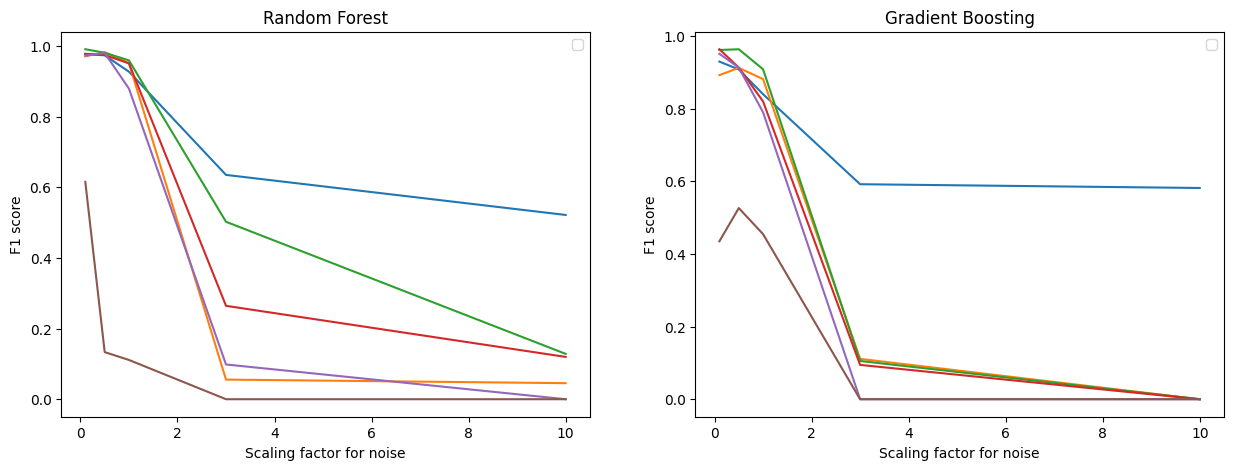

In [65]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(scaling_factors, accuracy_forest)
ax1.set_xlabel("Scaling factor for noise")
ax1.set_ylabel("F1 score")
ax1.set_title("Random Forest")
ax1.legend()

ax2.plot(scaling_factors, accuracy_boosting)
ax2.set_xlabel("Scaling factor for noise")
ax2.set_ylabel("F1 score")
ax2.set_title("Gradient Boosting")
ax2.legend()


Text(0.5, 0, 'Scaling Factors')

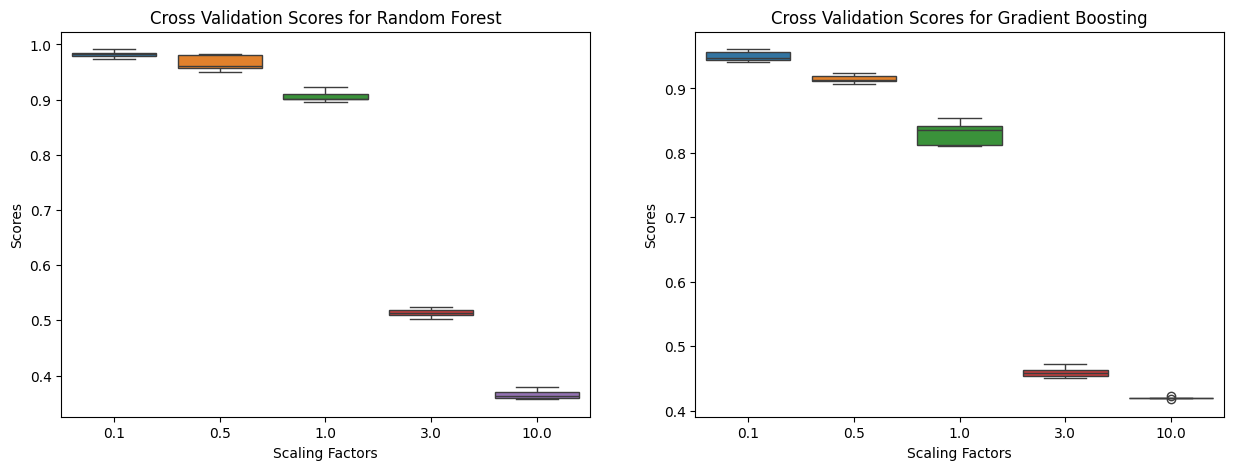

In [69]:
import seaborn as sns

# create a pandas dataframe for this
df_forest = pd.DataFrame(cross_val_scores_forest, index=scaling_factors).T
df_boosting = pd.DataFrame(cross_val_scores_boosting, index=scaling_factors).T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# Boxplot for df_forest on the first subplot
sns.boxplot(data=df_forest, ax=ax1)
ax1.set_title('Cross Validation Scores for Random Forest')
ax1.set_ylabel('Scores')
ax1.set_xlabel('Scaling Factors')

# Boxplot for df_boosting on the second subplot
sns.boxplot(data=df_boosting, ax=ax2)
ax2.set_title('Cross Validation Scores for Gradient Boosting')
ax2.set_ylabel('Scores')
ax2.set_xlabel('Scaling Factors')


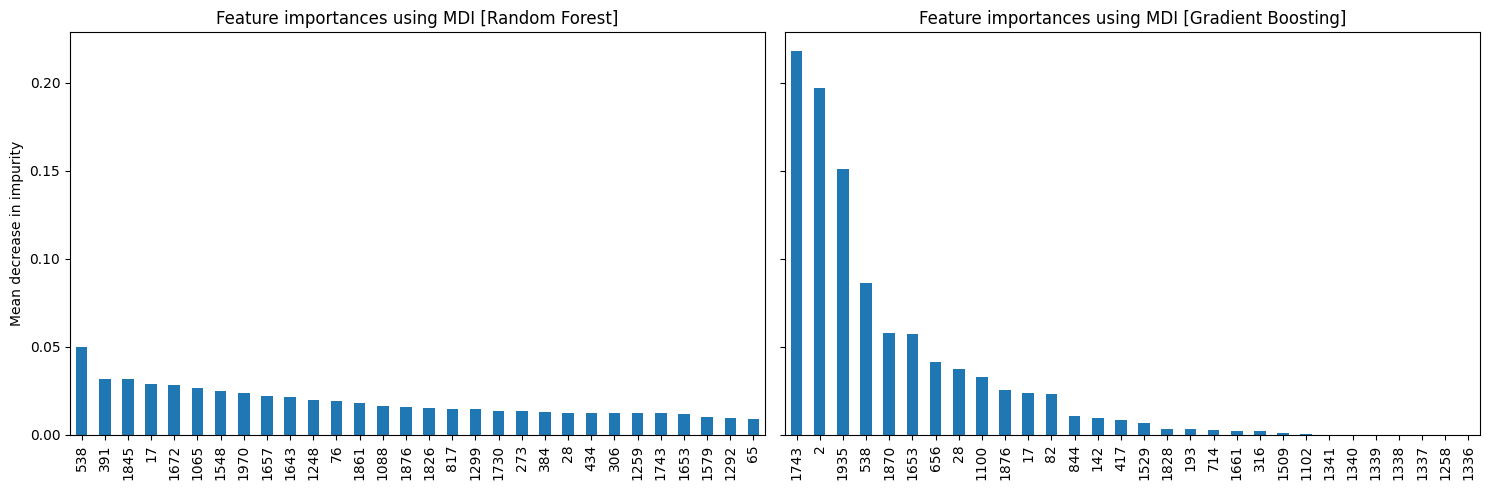

In [72]:
forest_importances = pd.Series(random_forest.feature_importances_)
boost_importances = pd.Series(gradient_boosting.feature_importances_)

# sort importances and stds in descending order
forest_importances = forest_importances.sort_values(ascending=False).head(30)
boost_importances = boost_importances.sort_values(ascending=False).head(30)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# Plot for Random Forest importances
forest_importances.plot(kind='bar', ax=ax1)
ax1.set_title("Feature importances using MDI [Random Forest]")
ax1.set_ylabel("Mean decrease in impurity")

# Plot for Gradient Boosting importances
boost_importances.plot(kind='bar', ax=ax2)
ax2.set_title("Feature importances using MDI [Gradient Boosting]")
ax2.set_ylabel("Mean decrease in impurity")

fig.tight_layout()
plt.show()

In [54]:
print(sum(random_forest.feature_importances_ == 0.0))
print(sum(gradient_boosting.feature_importances_ == 0.0))

1402
1978


In [37]:
from sklearn.metrics import f1_score
f1_score(y_test, random_forest.predict(X_test), average=None)

array([0.99415205, 0.97959184, 0.99588477, 0.99180328, 0.97674419,
       0.85714286])